# Evaluate Camel

In [1]:
import os
from plotnine import ggplot, aes, geom_boxplot, labs, theme, element_text, facet_wrap, facet_grid
from config import Config
import pandas as pd
from projects import ProjectName

projects = list(map(lambda x: x.github(), list(ProjectName)))
working_projects = dict()
for project in projects:
    try:
        designite_scores_path = Config.get_work_dir_path(os.path.join("paper", "analysis", "designite", project, "scores.csv"))
        designite_scores_df = pd.read_csv(designite_scores_path)
        designite_scores_df['dataset'] = 'Designite'
        designite_scores_df['project'] = project

        fowler_scores_path = Config.get_work_dir_path(os.path.join("paper", "analysis", "fowler", project, "scores.csv"))
        fowler_scores_df = pd.read_csv(fowler_scores_path)
        fowler_scores_df['dataset'] = 'Fowler'
        fowler_scores_df['project'] = project

        # traditional_scores_path = Config.get_work_dir_path(os.path.join("paper", "analysis", "traditional", project, "scores.csv"))
        # traditional_scores_df = pd.read_csv(traditional_scores_path)
        # traditional_scores_df['dataset'] = 'Traditional'
        # traditional_scores_df['project'] = project

        traditional_fowler_scores_path = Config.get_work_dir_path(os.path.join("paper", "analysis", "fowler_traditional", project, "scores.csv"))
        traditional_fowler_scores_df  = pd.read_csv(traditional_fowler_scores_path)
        traditional_fowler_scores_df['dataset'] = 'Traditional +\n Fowler'
        traditional_fowler_scores_df['project'] = project

        # traditional_designite_scores_path = Config.get_work_dir_path(os.path.join("paper", "analysis", "traditional_designite", project, "scores.csv"))
        # traditional_designite_scores_df = pd.read_csv(traditional_designite_scores_path)
        # traditional_designite_scores_df['dataset'] = 'Traditional +\n Designite'
        # traditional_designite_scores_df['project'] = project

        designite_fowler_scores_path = Config.get_work_dir_path(os.path.join("paper", "analysis", "designite_fowler", project, "scores.csv"))
        designite_fowler_scores_df = pd.read_csv(designite_fowler_scores_path )
        designite_fowler_scores_df['dataset'] = 'Designite +\n Fowler'
        designite_fowler_scores_df['project'] = project

        traditional_designite_fowler_path = Config.get_work_dir_path(os.path.join("paper", "analysis", "designite_fowler_traditional", project, "scores.csv"))
        traditional_designite_fowler_scores_df  = pd.read_csv(traditional_designite_fowler_path)
        traditional_designite_fowler_scores_df['dataset'] = 'Traditional +\n Designite +\n Fowler'
        traditional_designite_fowler_scores_df['project'] = project

        datasets = [
            designite_scores_df,
            fowler_scores_df,
            # traditional_scores_df,
            traditional_fowler_scores_df,
            # traditional_designite_scores_df,
            designite_fowler_scores_df,
            traditional_designite_fowler_scores_df
        ]

        scores_df = pd.concat(datasets, ignore_index=True)
        working_projects[project] = scores_df
    except Exception:
        continue

pass

The history saving thread hit an unexpected error (AttributeError("'sqlite3.Connection' object has no attribute 'extract_datasets'")).History will not be written to the database.


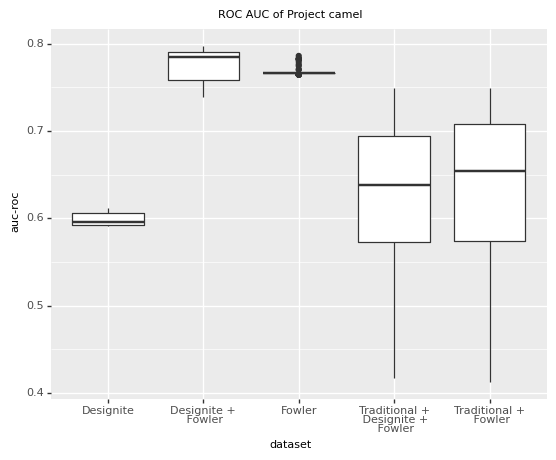

<ggplot: (284129351)>
                      estimator  \
0                  DecisionTree   
1                  DecisionTree   
2                  RandomForest   
3                  RandomForest   
4          SupportVectorMachine   
..                          ...   
395        MultilayerPerceptron   
396           K-NearestNeighbor   
397        MultilayerPerceptron   
398          LogisticRegression   
399  LinearDiscriminantAnalysis   

                                         configuration feature_selection  \
0                                {'criterion': 'gini'}          chi2_20p   
1                             {'criterion': 'entropy'}          chi2_20p   
2                                 {'n_estimators': 10}          chi2_20p   
3                                {'n_estimators': 100}          chi2_20p   
4                                           {'C': 100}          chi2_20p   
..                                                 ...               ...   
395  {'activation': 'relu

In [2]:
# for project in working_projects.keys():
#     scores_df = working_projects[project]
project = list(working_projects.keys())[0]
scores_df = working_projects[project]
g = (ggplot(data=scores_df,
            mapping=aes(x='dataset',
                        y='auc-roc'))
        + geom_boxplot()
        + labs(title="ROC AUC of Project {0}".format(project))
        + theme(text=element_text(size=8))
     )
print(g)
print(scores_df)

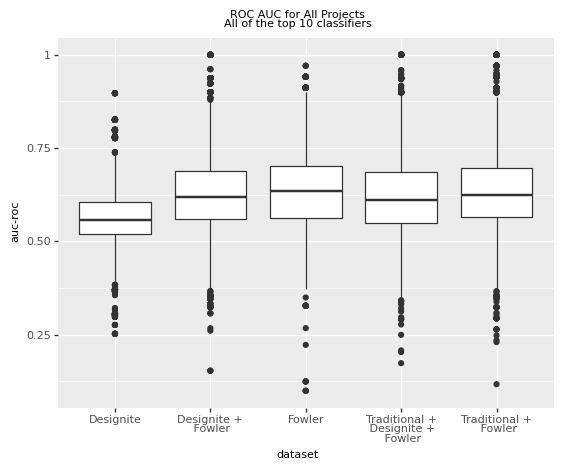

<ggplot: (-9223372036538520113)>


In [3]:
scores = pd.concat(list(working_projects.values()), ignore_index=True)
g = (ggplot(data=scores,
            mapping=aes(x='dataset',
                        y='auc-roc'))
     + geom_boxplot()
     + labs(title="ROC AUC for All Projects\nAll of the top 10 classifiers")
     + theme(text=element_text(size=8)))
print(g)

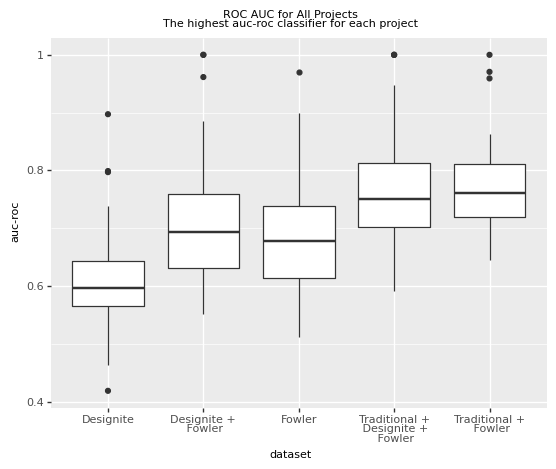

<ggplot: (-9223372036538460784)>


In [4]:
auc_scores = pd.concat(list(map(lambda x:
                                x.drop(['estimator', 'configuration'], axis=1)
                                 .groupby('dataset')
                                 .aggregate({'auc-roc': 'max'})
                                 .reset_index(), working_projects.values())))

g = (ggplot(data=auc_scores,
            mapping=aes(x='dataset',
                        y='auc-roc'))
     + geom_boxplot()
     + labs(title="ROC AUC for All Projects\nThe highest auc-roc classifier for each project")
     + theme(text=element_text(size=8)))
print(g)

In [5]:
auc_scores = pd.concat(list(map(lambda x:
                                x.drop(['estimator', 'configuration'], axis=1)
                                 .groupby('dataset')
                                 .aggregate({'auc-roc': 'mean'})
                                 .reset_index(), working_projects.values())))

g = (ggplot(data=auc_scores,
            mapping=aes(x='dataset',
                        y='auc-roc'))
     + facet_wrap("~selected_features")
     + geom_boxplot()
     + labs(title="ROC AUC for All Projects\nAverage auc-roc classifier for each project")
     + theme(text=element_text(size=8)))
print(g)

PlotnineError: 'At least one layer must contain all variables used for facetting'

In [ ]:
scores = pd.concat(list(map(lambda x: x.drop(['estimator', 'configuration'], axis=1)
                            .groupby(['dataset', 'feature_selection'])
                            .aggregate({'auc-roc': 'mean'})
                            .reset_index(), working_projects.values())))
g = (ggplot(data=scores,
            mapping=aes(x='dataset',
                        y='auc-roc'))
     + facet_wrap("~feature_selection")
     + geom_boxplot()
     )

print(g)


